In [ ]:
import numpy as np
import pandas as pd
import os
print (os.getcwd())
print (os.listdir())
# Loading csv into dataframe
raw_data = pd.read_csv('/content/student-mat.csv', sep=';')
# print(raw_data[:5])

/content
['.config', 'student-por.csv', 'student-mat.csv', 'sample_data']


In [ ]:
# raw_data.isnull().sum()
# no null values found

In [ ]:
raw_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
## for visualising any individual column
# import matplotlib.pyplot as plt
# %matplotlib inline
# ax2 = raw_data['G1'].plot.hist(bins=20)

In [ ]:
# list of categorical features:
categorical_features = [
    'school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup',
    'famsup','paid','activities','nursery','higher','internet','romantic']

In [ ]:
# to create a dictionary : {features : {feature_value : encoding}}

def feature_to_encoding(data, categorical_features):
    
    main_dict = {}
    
    for feature in categorical_features:
        features_encoding = {}
        encodingNumber = 0
        for val in data[feature]:
            if val not in features_encoding.values():
                features_encoding[encodingNumber] = val
                encodingNumber+=1
        main_dict[feature] = features_encoding
        
    return main_dict

features_encoding = feature_to_encoding(raw_data, categorical_features)

In [ ]:
# # checking counts of all categorical features:
# for col in categorical_features:
#     print (raw_data[col].value_counts())

In [ ]:
features_encoding

{'Fjob': {0: 'teacher', 1: 'other', 2: 'services', 3: 'health', 4: 'at_home'},
 'Mjob': {0: 'at_home', 1: 'health', 2: 'other', 3: 'services', 4: 'teacher'},
 'Pstatus': {0: 'A', 1: 'T'},
 'activities': {0: 'no', 1: 'yes'},
 'address': {0: 'U', 1: 'R'},
 'famsize': {0: 'GT3', 1: 'LE3'},
 'famsup': {0: 'no', 1: 'yes'},
 'guardian': {0: 'mother', 1: 'father', 2: 'other'},
 'higher': {0: 'yes', 1: 'no'},
 'internet': {0: 'no', 1: 'yes'},
 'nursery': {0: 'yes', 1: 'no'},
 'paid': {0: 'no', 1: 'yes'},
 'reason': {0: 'course', 1: 'other', 2: 'home', 3: 'reputation'},
 'romantic': {0: 'no', 1: 'yes'},
 'school': {0: 'GP', 1: 'MS'},
 'schoolsup': {0: 'yes', 1: 'no'},
 'sex': {0: 'F', 1: 'M'}}

In [ ]:
from sklearn.preprocessing import LabelEncoder

def categorical_to_numeric(data, categorical_features):
    encoder = LabelEncoder()
    for feature in categorical_features:
        data[feature] = encoder.fit_transform(data[feature].astype('str'))
    return data

In [ ]:
numeric_data = categorical_to_numeric(raw_data, categorical_features)

In [ ]:
# numeric_data.head()

In [ ]:
# numeric_data['G3'].describe()

In [ ]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 7,7 
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
!pip install heatmapz

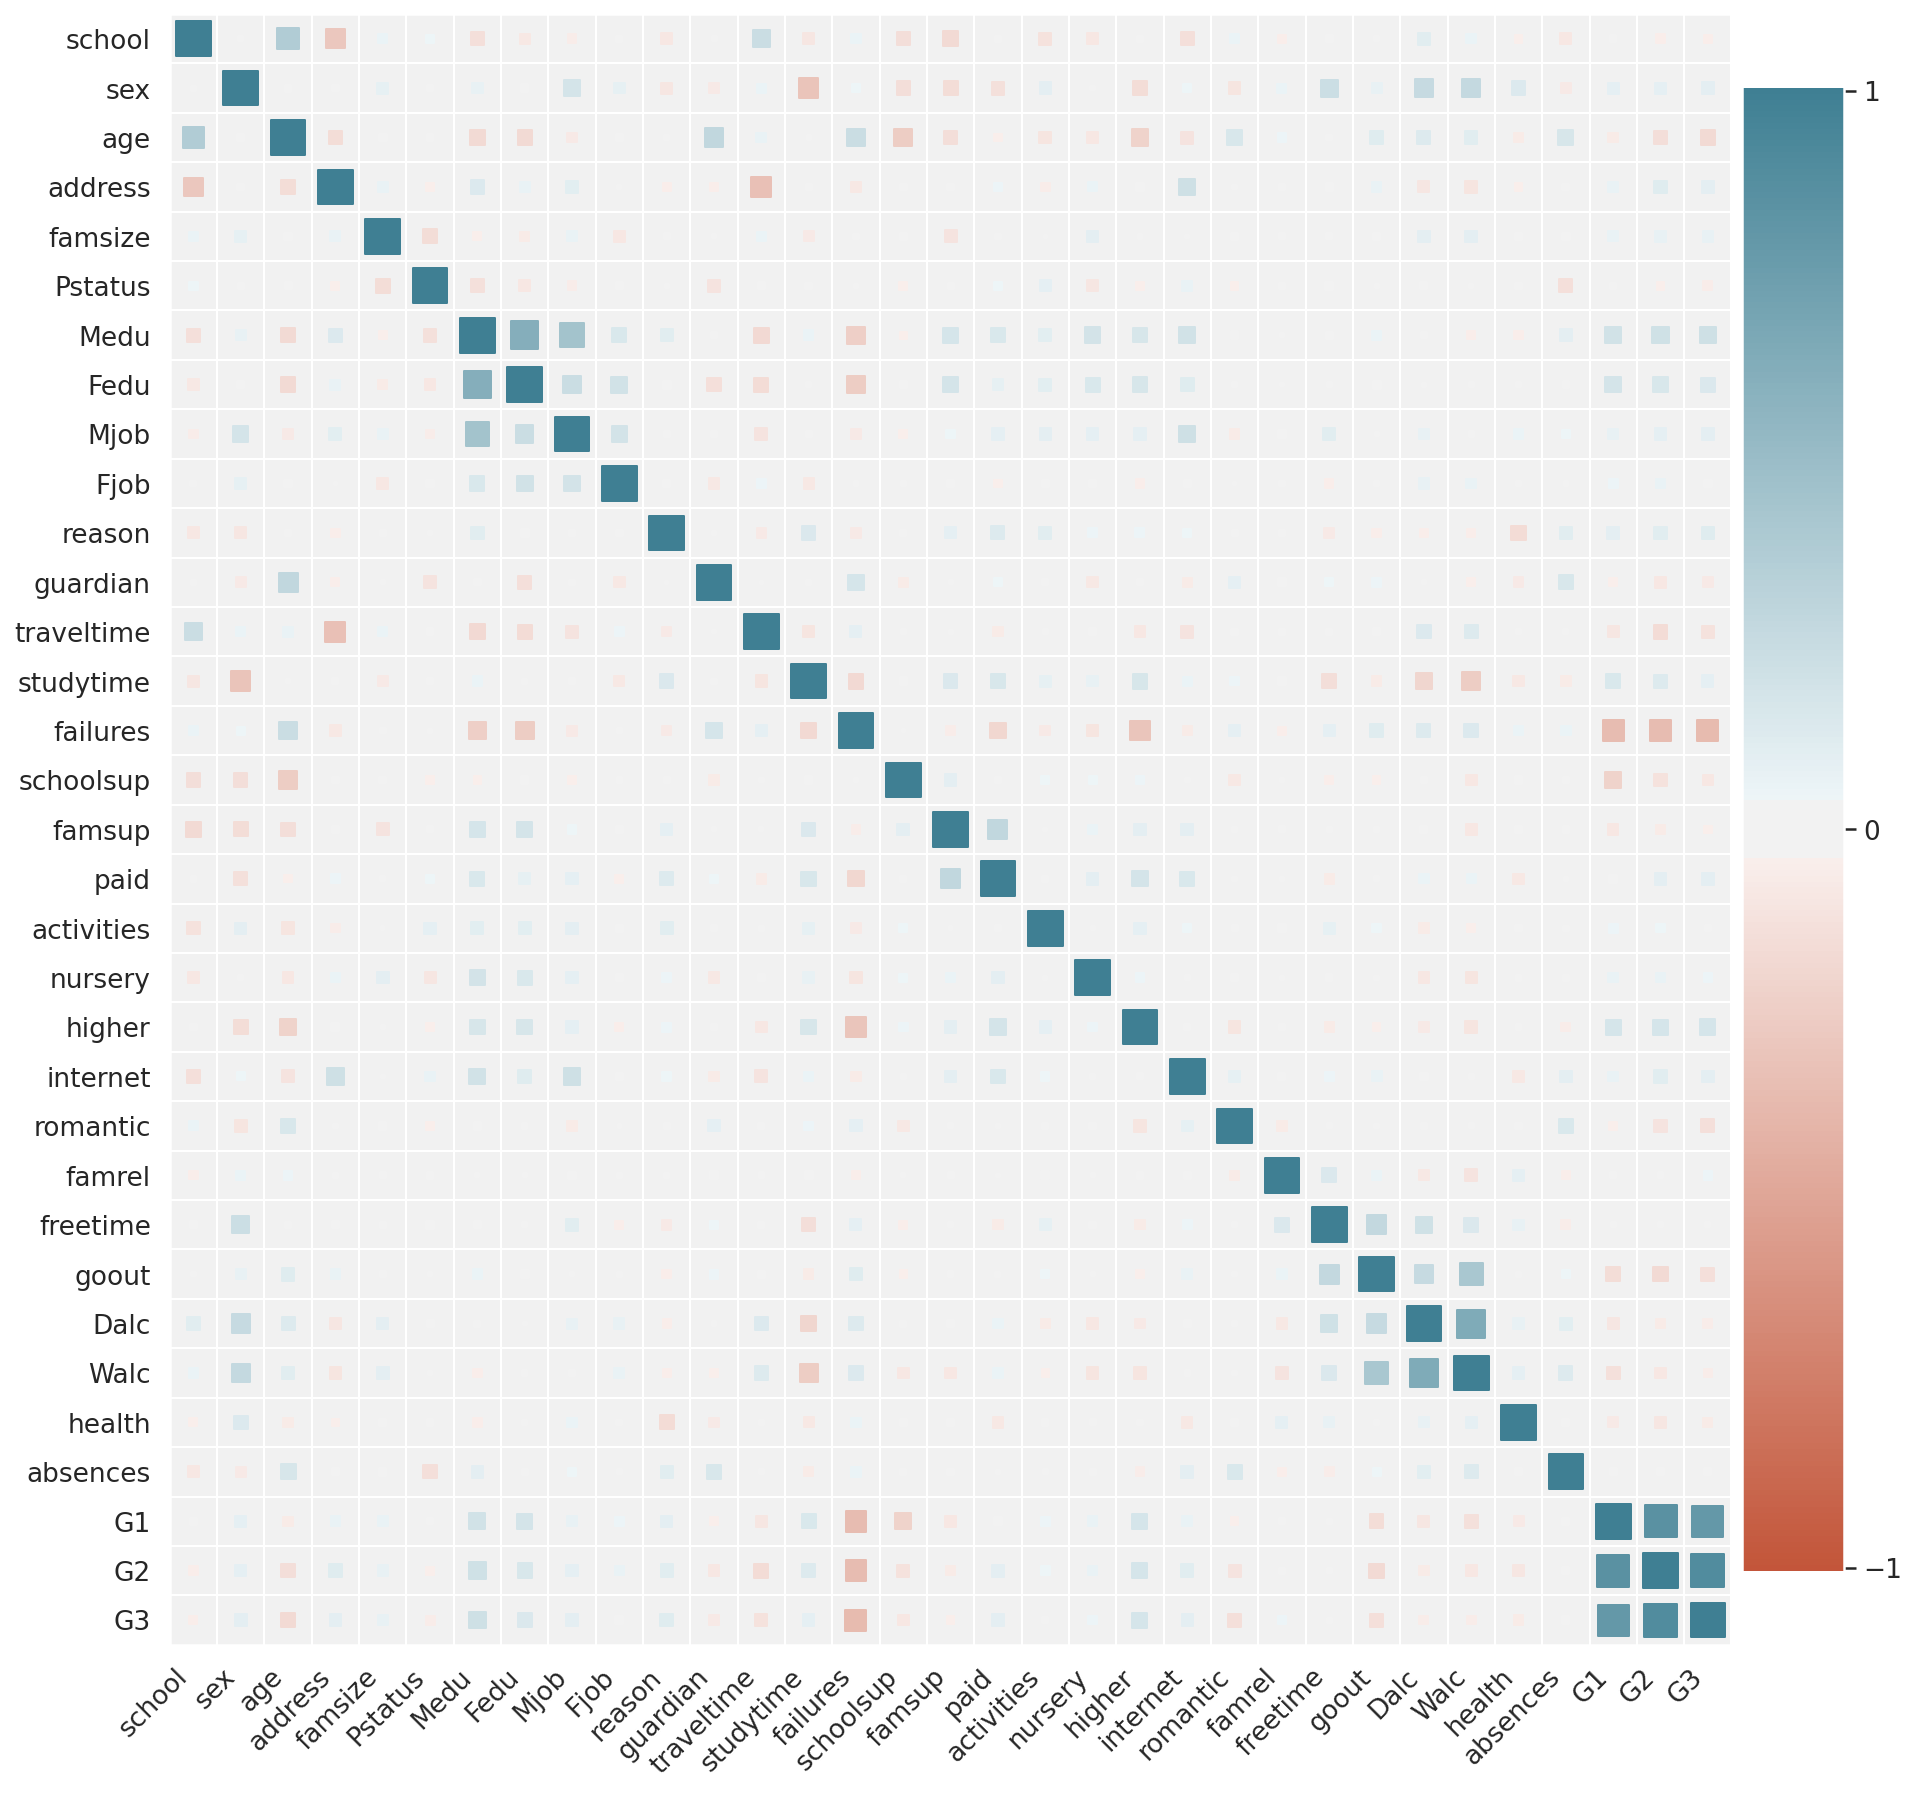

In [ ]:
# Import the two methods from heatmap library
from heatmap import heatmap, corrplot
plt.figure(figsize=(15, 15))
corrplot(numeric_data.corr(), size_scale=300);



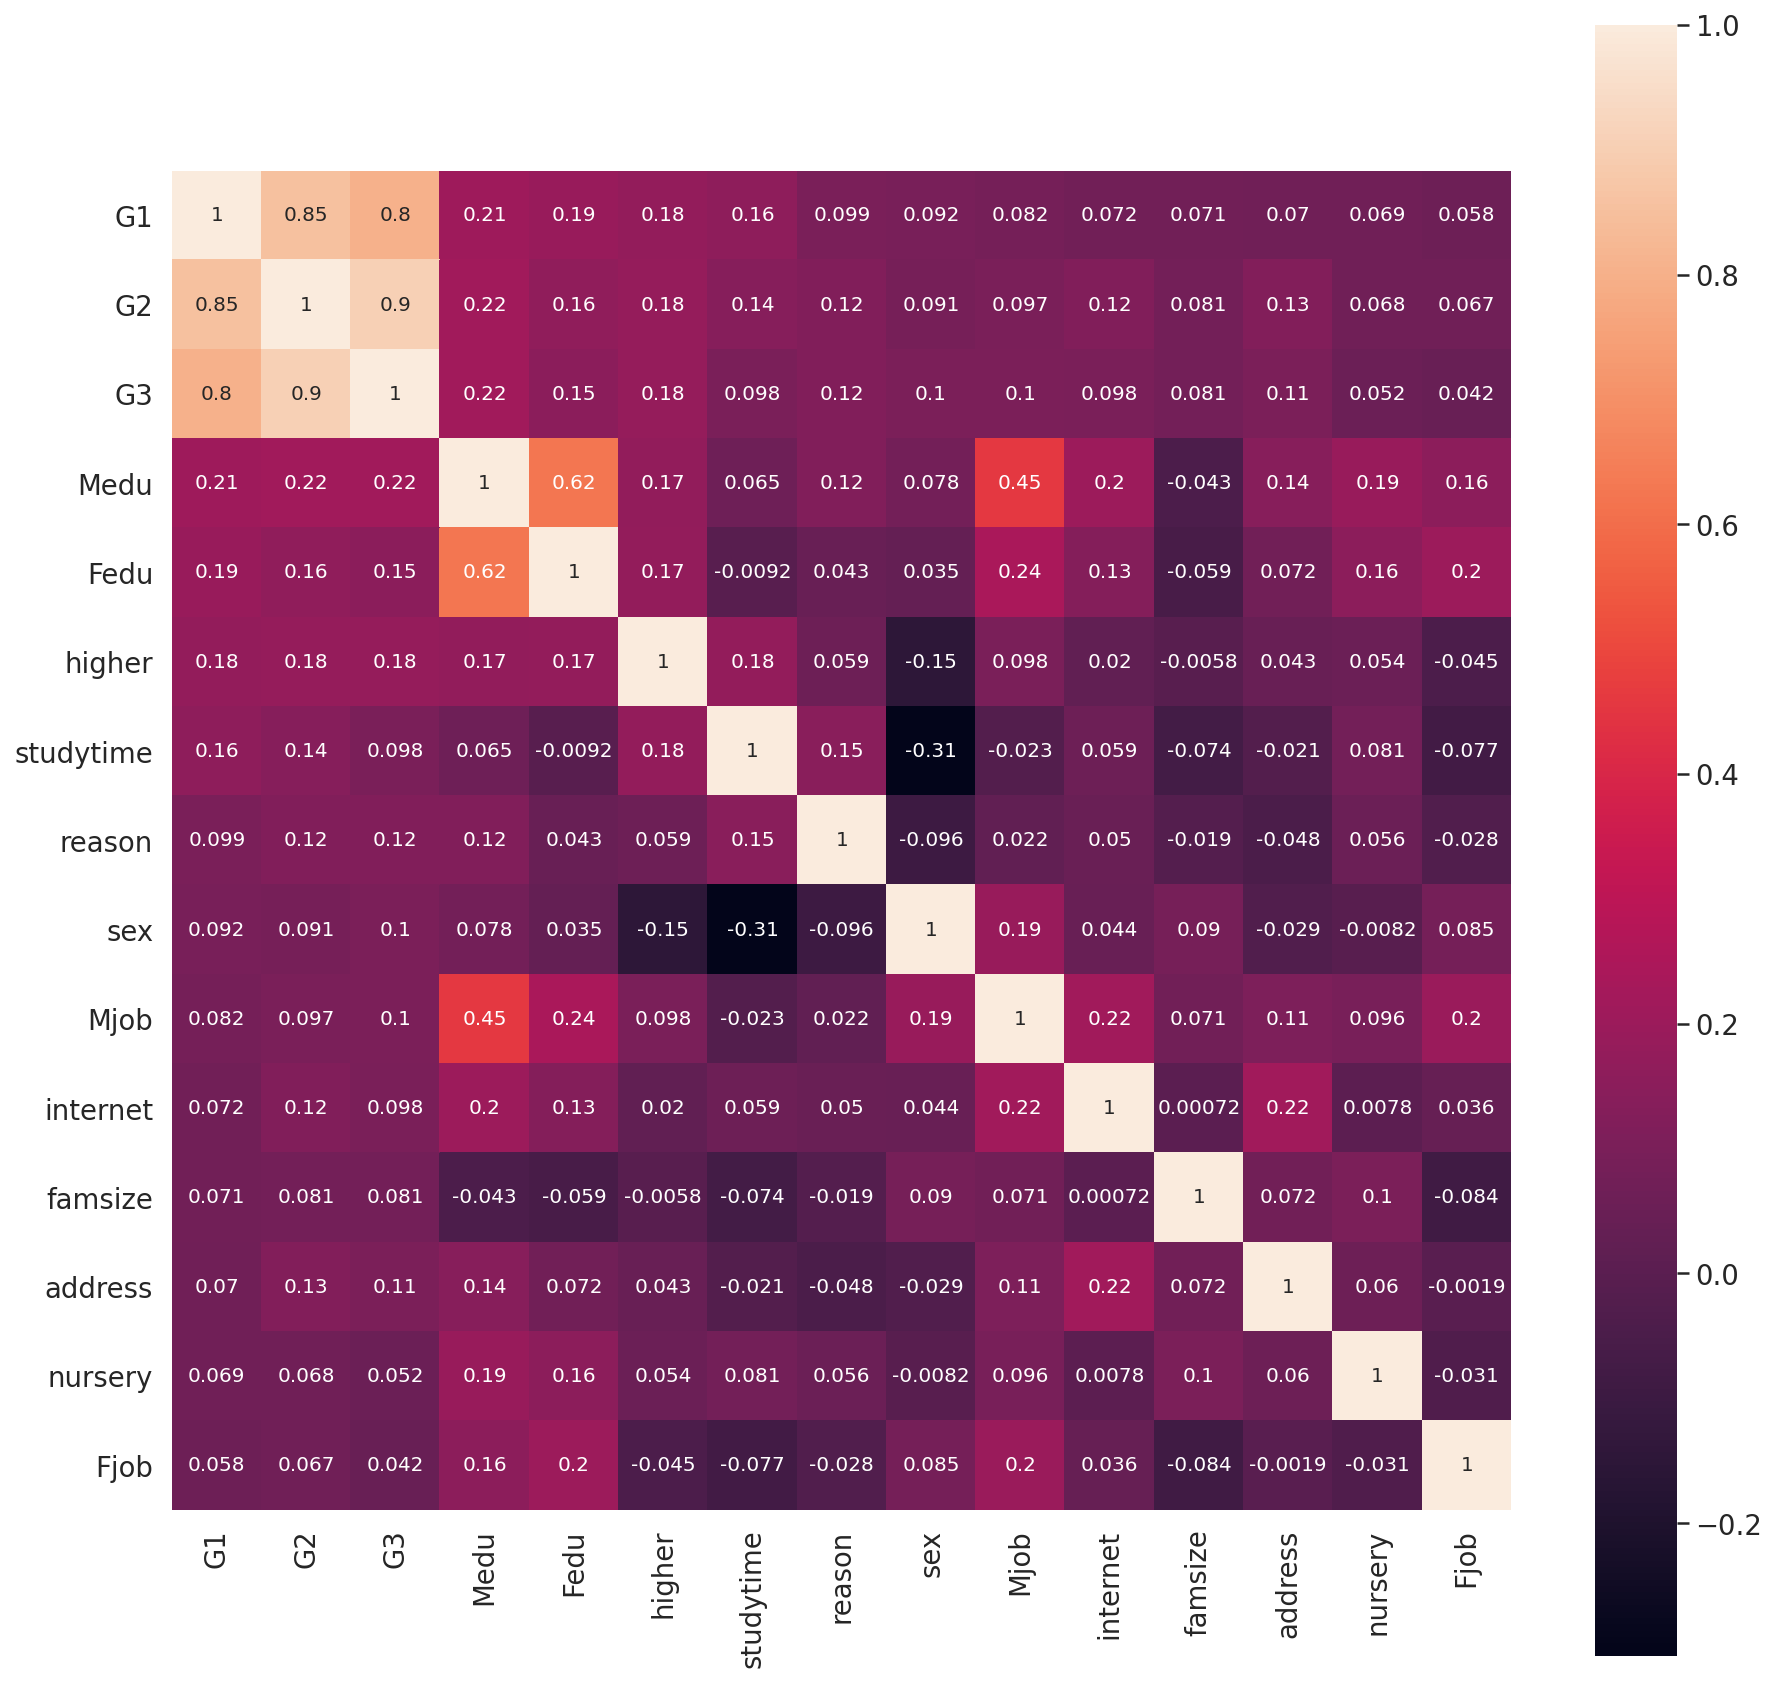

In [ ]:
import seaborn
corr = numeric_data.corr()

# number of variables for heatmap
k = 15

cols = corr.nlargest(k, 'G1')['G1'].index

# print (cols)

cm = np.corrcoef(numeric_data[cols].values.T)

plt.figure(figsize=(15, 15))

sns.set(font_scale=1.25)
sns.heatmap(cm, cbar = True, annot = True, square = True, annot_kws = {'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [ ]:
Y = numeric_data['G3']

G = numeric_data.copy(deep=True)
G.drop([col for col in raw_data if (col not in ['G2', 'G1'])], axis=1, inplace=True)

A = numeric_data.copy(deep = True)
B = numeric_data.copy(deep = True)
C = numeric_data.copy(deep = True)

C.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)
B.drop(['G1', 'G3'], axis=1, inplace=True)
A.drop(['G3'], axis=1, inplace=True)

# D = C.copy(deep=True)
# col_drop = [col for col in C if (col not in cols)]
# D.drop(col_drop, axis = 1, inplace=True)

In [ ]:
# for col in D:
#     print (col)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def preprocess(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)
    X_scaler = StandardScaler().fit(X_train)
    X_scaler.transform(X_train)
    X_scaler.transform(X_test)
    return X_train, X_test, Y_train, Y_test

In [ ]:
# print(X_train.describe(), X_test.describe(), Y_train.describe(), Y_test.describe())

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


def grid_svm_train(X_train, Y_train):
    
    param_grid = {'C': [5, 10, 20], 'gamma': [0.05, 0.01, 0.02],'kernel': ['rbf']} 
    model = GridSearchCV(SVR(), param_grid, refit = True, verbose=2)
    model.fit(X_train, Y_train)
    print ("\nBest parameters are:\n")
    print (model.best_params_)
    return model

def grid_rf_train(X_train, Y_train):
    
    n_estimators = [600, 1200, 1800, 2400, 3000]
    max_features = ['auto']
    max_depth = [40, 60, 80, 100]
    min_samples_split = [2, 4]
    min_samples_leaf = [2, 4]
    bootstrap = [True]

    # Create the random grid
    param_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}


    # Use the random grid to search for best hyperparameters
    rf = RandomForestRegressor()

    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    model = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
    
    # Fit the random search model
    model.fit(X_train, Y_train)
    best_model = model.best_estimator_
    print ("\nBest parameters are:\n")
    print (model.best_params_)
    
    return best_model


def svm_train(X_train,Y_train):
    model = SVR(kernel='rbf',gamma =0.01,C=10)
    model.fit(X_train, Y_train)
    return model

def rf_train(X_train, Y_train):
    model = RandomForestRegressor(n_estimators=1200, max_depth=60, min_samples_split=4, min_samples_leaf=2)
    model.fit(X_train, Y_train)
    return model

def ridgeRegression(X_train, Y_train):
    model = Ridge(alpha=0.5)
    model.fit(X_train, Y_train)
    return model

def lassoRegression(X_train, Y_train):
    model = Lasso(alpha=0.5)
    model.fit(X_train, Y_train)
    return model

def evaluate(model, X_test, Y_test):    
    predictions = model.predict(X_test)
    return (mean_squared_error(Y_test, predictions))

def ensemble(models, X_test, Y_test):
    i=1
    predictions = models[0].predict(X_test)
    for model in models[1:]:
        predictions += model.predict(X_test)
        i+=1
     
    return (mean_squared_error(Y_test, predictions/i))

In [ ]:
def casewiserun(X, Y):
    X_train, X_test, Y_train, Y_test = preprocess(X,Y)
    svm = svm_train(X_train, Y_train)
    rf = rf_train(X_train, Y_train)
    rr = ridgeRegression(X_train, Y_train)
    lasso = lassoRegression(X_train, Y_train)
    print (ensemble([svm, rf, rr, lasso], X_test, Y_test))
    return evaluate(svm, X_test, Y_test), evaluate(rf, X_test, Y_test), evaluate(rr, X_test, Y_test), evaluate(lasso, X_test, Y_test)

In [ ]:
rmseA_svm, rmseA_rf, rmseA_rr, rmseA_l = casewiserun(A, Y)
rmseB_svm, rmseB_rf, rmseB_rr, rmseB_l = casewiserun(B, Y)
rmseC_svm, rmseC_rf, rmseC_rr, rmseC_l = casewiserun(C, Y)
# rmseD_svm, rmseD_rf, rmseD_rr, rmseD_l = casewiserun(D,Y)
rmseG_svm, rmseG_rf, rmseG_rr, rmseG_l = casewiserun(G,Y)



print("\nResults in the order SVM, Random forest, Ridge regresion, Lasso regression\n")
print("Model with all features")
print (rmseA_svm, rmseA_rf, rmseA_rr, rmseA_l)
print("\n")
print("Model with all features - {G1}")
print (rmseB_svm, rmseB_rf, rmseB_rr, rmseB_l)
print("\n")
print("Model with all features - {G1, G2}")
print (rmseC_svm, rmseC_rf, rmseC_rr, rmseC_l)
print("\n")
# print("Model with top 10 correlated to G3 features")
# print (rmseD_svm, rmseD_rf, rmseD_rr, rmseD_l)
# print("\n")
print("Model with only features = {G1, G3}")
print (rmseG_svm, rmseG_rf, rmseG_rr, rmseG_l)


3.8499830202368774
3.952065143852515
15.534212572157625
4.154243239979792

Results in the order SVM, Random forest, Ridge regresion, Lasso regression

Model with all features
4.347388794093593 3.7989328659087946 5.02427544117775 4.160267015916977


Model with all features - {G1}
4.492338207893276 3.8848676249431553 5.100320895246775 4.205302600649901


Model with all features - {G1, G2}
15.348956862465954 14.13049740439349 18.51248417577604 18.592229667184068


Model with only features = {G1, G3}
4.310502242180816 4.685128570242046 4.211760824742721 4.157818802789821


In [ ]:
numeric_data.shape

(395, 33)

In [ ]:
# Trying a basic Neural Network (for curiosity) 
import torch
import torch.optim as optimizer

'''
Current status: Model overfitting a bit, more robust than other methods which are varying results with the random state values in Preprocess 
'''
device = 'cpu'
# x = torch.randn(N, D_in)
# y = torch.randn(N, D_out)

X_train, X_test, Y_train, Y_test = preprocess(A,Y)

y_train = torch.tensor(Y_train.values, dtype = torch.float).unsqueeze(1)
x_train = torch.tensor(X_train.values, dtype = torch.float)
y_test = torch.tensor(Y_test.values, dtype = torch.float).unsqueeze(1)
x_test = torch.tensor(X_test.values, dtype = torch.float)

N, D_in, H, D_out = 395, x_train.shape[1], 30, 1
lr = 1e-2

# print (y.shape)
# print (x.shape)

class FourLayerNet(torch.nn.Module):
  def __init__(self, D_in, H, D_out):
    super(FourLayerNet, self).__init__()
    self.linear1 = torch.nn.Linear(D_in, H)
    self.linear2 = torch.nn.Linear(H, H*2)
    self.linear3 = torch.nn.Linear(H*2, H)
    self.linear4 = torch.nn.Linear(H, D_out)
    self.dropout = torch.nn.Dropout(0.05)
  
  def forward(self,x):
    x = self.linear1(x).clamp(min=0)
    x = self.linear2(x).clamp(min=0)
    x = self.dropout(x)
    x = self.linear3(x).clamp(min=0)
    x = self.dropout(x)
    y_pred = self.linear4(x)
    return y_pred

model = FourLayerNet(D_in, H, D_out).to(device)
optimizer = optimizer.Adam(model.parameters(), lr = lr)
loss_fn = torch.nn.MSELoss(reduction = 'mean')

# training
for t in range(10000):
  y_pred = model(x_train)
  loss = loss_fn(y_pred, y_train)
  if (t%100 == 99): print("Training loss:", t, loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  with torch.no_grad():
    y_pred = model(x_test)
    loss = loss_fn(y_pred, y_test)
    if (t%100 == 99): print("Test loss:",t,"  ",loss.item(),"\n")

  

Training loss: 99 4.432005882263184
Test loss: 99    5.772043704986572 

Training loss: 199 1.7353664636611938
Test loss: 199    6.700271129608154 

Training loss: 299 1.8017195463180542
Test loss: 299    6.698147296905518 

Training loss: 399 1.8915308713912964
Test loss: 399    7.365934371948242 

Training loss: 499 1.6096668243408203
Test loss: 499    6.903993129730225 

Training loss: 599 1.549498438835144
Test loss: 599    7.408339977264404 

Training loss: 699 1.5405356884002686
Test loss: 699    6.230029106140137 

Training loss: 799 1.7710552215576172
Test loss: 799    6.47807502746582 

Training loss: 899 1.5446852445602417
Test loss: 899    7.180882930755615 

Training loss: 999 1.7830289602279663
Test loss: 999    5.940104007720947 

Training loss: 1099 1.5341265201568604
Test loss: 1099    6.990462303161621 

Training loss: 1199 1.4159880876541138
Test loss: 1199    7.1767401695251465 

Training loss: 1299 1.6418912410736084
Test loss: 1299    7.83347225189209 

Training lo

In [ ]:
# Trying a basic Neural Network (for curiosity) 
import torch
import torch.optim as optimizer

'''
Current status: Model overfitting a bit, more robust than other methods which are varying results with the random state values in Preprocess 
'''
device = 'cpu'
# x = torch.randn(N, D_in)
# y = torch.randn(N, D_out)

X_train, X_test, Y_train, Y_test = preprocess(A,Y)

y_train = torch.tensor(Y_train.values, dtype = torch.float).unsqueeze(1)
x_train = torch.tensor(X_train.values, dtype = torch.float)
y_test = torch.tensor(Y_test.values, dtype = torch.float).unsqueeze(1)
x_test = torch.tensor(X_test.values, dtype = torch.float)

N, D_in, H, D_out = 395, x_train.shape[1], 3, 1
lr = 1e-2

# print (y.shape)
# print (x.shape)

class TwoLayerNet(torch.nn.Module):
  def __init__(self, D_in, H, D_out):
    super(TwoLayerNet, self).__init__()
    self.linear1 = torch.nn.Linear(D_in, H)
    # self.linear2 = torch.nn.Linear(H, H)
    self.linear2 = torch.nn.Linear(H, D_out)
    self.dropout = torch.nn.Dropout(0.1)
  
  def forward(self,x):
    h_relu = self.linear1(x).clamp(min=0)
    # h_relu = self.linear2(h_relu).clamp(min=0)
    y_pred = self.linear2(h_relu)
    return y_pred

model = TwoLayerNet(D_in, H, D_out).to(device)
optimizer = optimizer.Adam(model.parameters(), lr = lr)
loss_fn = torch.nn.MSELoss(reduction = 'mean')

# training
for t in range(10000):
  y_pred = model(x_train)
  loss = loss_fn(y_pred, y_train)
  if (t%100 == 99): print("Training loss:", t, loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  with torch.no_grad():
    y_pred = model(x_test)
    loss = loss_fn(y_pred, y_test)
    if (t%100 == 99): print("Test loss:",t,"  ",loss.item(),"\n")

  

Training loss: 99 7.918083667755127
Test loss: 99    7.154349327087402 

Training loss: 199 3.816115379333496
Test loss: 199    5.082684516906738 

Training loss: 299 3.253669500350952
Test loss: 299    5.237374782562256 

Training loss: 399 3.047501564025879
Test loss: 399    5.190430641174316 

Training loss: 499 2.953277111053467
Test loss: 499    5.0999674797058105 

Training loss: 599 2.913165807723999
Test loss: 599    5.040261745452881 

Training loss: 699 2.896608829498291
Test loss: 699    5.008758544921875 

Training loss: 799 2.8895277976989746
Test loss: 799    4.993769645690918 

Training loss: 899 2.886293411254883
Test loss: 899    4.986320972442627 

Training loss: 999 2.8846821784973145
Test loss: 999    4.983540058135986 

Training loss: 1099 2.8837637901306152
Test loss: 1099    4.985053539276123 

Training loss: 1199 2.8831350803375244
Test loss: 1199    4.987174034118652 

Training loss: 1299 2.8826417922973633
Test loss: 1299    4.988551139831543 

Training loss: 